# Tugas UTS : Processing Data PTA

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ranianuraini/prosainsdata/main/Data_PTA.csv')
# df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


## Processing Data Null



### Cek Data Null

In [3]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

Terdapat 3 data kosong pada abstrak

### Hapus Data Null

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

Menghapus data Kosong pada abstrak

### Cek data not null

In [6]:
df.count()

NPM        810
Judul      810
Abstrak    810
Prodi      810
Label      810
dtype: int64

Data yang tidak kosong berjumlah 795

### Cek Jumlah Class Data

In [7]:
# Jumlah data pada masing-masing label KBK
# df['Kelas'].value_counts()
df['Label'].value_counts()

komputasi    573
RPL          198
PBA           39
Name: Label, dtype: int64

### Grafik data Class

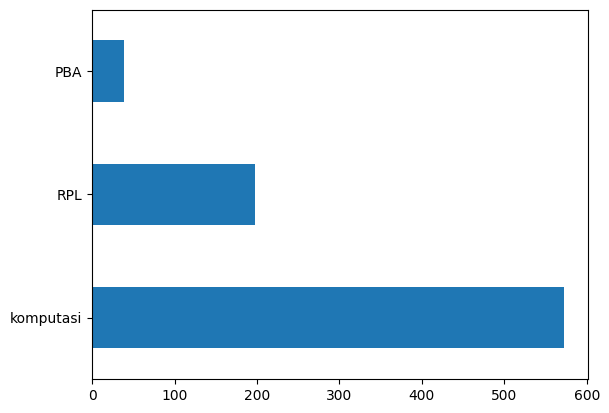

In [8]:
import matplotlib.pyplot as plt

# df['Kelas'].value_counts().plot(kind='barh')
df['Label'].value_counts().plot(kind='barh')
plt.show()

## Cleaning Text

In [9]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [10]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL
1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi
4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


### Export Data Cleaning

In [11]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('PtaCleaning.csv')

### Menghapus Missing Value

In [12]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [13]:
# Cek missing values
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [14]:
# Remove missing values
df.dropna(inplace=True)
len(df)

810

### Menghapus Duplicate Value

In [15]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label
728,120411100015,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Teknik Informatika,komputasi


#### Cek Data Kolom Judul

In [16]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


#### Cek Data Kolom Abstrak

In [17]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [18]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

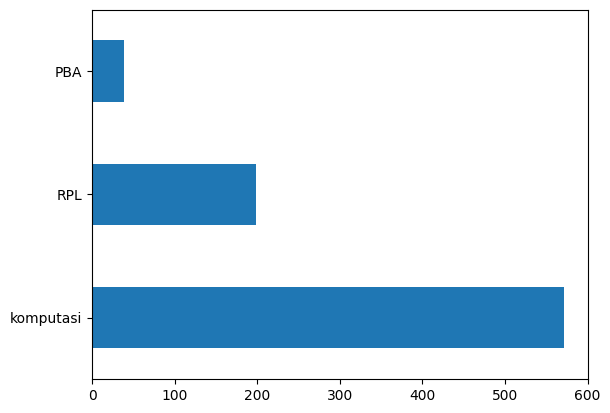

In [19]:
# Distribusi Kelas setelah Text Preprocessing
# df['Kelas'].value_counts().plot(kind='barh')
df['Label'].value_counts().plot(kind='barh')
plt.show()

## Tokenisasi
Memecah Kalimat Per kata

In [20]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Tokenisasi Judul

In [21]:
# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database t...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,rancang bangun aplikasi proxy server untukenkr...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


### Tokenisasi Abstrak

In [22]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


## Menghapus Stop Word

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stop Word Judul

In [25]:
# df[["Judul", "judul_tokens"]].head()

### Stop Word Abstrak

In [26]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


## Stemming
Mengubah

In [27]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.1 MB/s eta 0:00:00


In [28]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#### Stemming Judul

In [29]:
# # Stemming judul
# df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

In [30]:
# # Hasil stemming judul
# df[["Judul", "judul_tokens"]].head()

#### Stemming Abstrak

In [31]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [32]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."


In [33]:
# df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('DataOlah_Pta.csv')

In [34]:
# dataOlah = pd.read_csv('DataOlah_Pta.csv', index_col=0)
dataOlah = pd.read_csv('https://raw.githubusercontent.com/ranianuraini/prosainsdata/main/DataOlah_Pta.csv')
dataOlah.head()

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['perancangan', 'implementasi', 'sistem', 'dat...",sistem informasi akademik siakad sistem inform...
1,1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['aplikasi', 'kontrol', 'monitoring', 'jaringa...",jalan koneksi jaring komputer lancar ganggu ha...
2,2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['rancang', 'bangun', 'aplikasi', 'proxy', 'se...",web server perangkat lunak server berfungsimen...
3,3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['sistem', 'pendukung', 'keputusan', 'optimasi...",jadwal kuliah guru kompleks masalah variabel t...
4,4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['sistem', 'augmented', 'reality', 'animasi', ...",iring kembang teknologi dunia muncul teknologi...


# Modeling Data

In [35]:
from sklearn.model_selection import train_test_split

X = dataOlah['abstrak_tokens']
y = dataOlah['Label']

## Ekstraksi Fitur
term frequency–inverse document frequency

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)
# X_test_tfidf = vectorizer.transform(X_test)

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_tfidf.shape

(809, 6442)

In [38]:
terms = vectorizer.get_feature_names_out()

sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                       term       rank
5376                 sistem  32.339549
1173                   data  28.965659
939                   citra  28.863548
3609                 metode  28.713771
2085                  hasil  27.121133
...                     ...        ...
3887  numberabstrakberbagai   0.051212
2479        jarimenggunakan   0.051212
5160                seirver   0.040808
264                analyzer   0.040808
6364              wireshark   0.040808

[6442 rows x 2 columns]


## Training Data

KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)

NameError: ignored

NAive Baiyes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()
model_bayes = bayes.fit(X_train,y_train)
predictions_bayes = model_bayes.predict(X_test)

## Evaluasi

KNN

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_knn))

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_knn))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

Naive Baiyes

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_bayes))

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_bayes))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

Akurasi Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('KNN')
print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

print('')
print('Naive Bayes')
print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

## Export Model

In [ ]:
dump(model_knn, filename="model_knn.joblib")
dump(model_bayes, filename="model_bayes.joblib")
dump(vectorizer, filename="vectorizer_model_abstrak.joblib")